In [3]:
# Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Step 2: Load the dataset
df = pd.read_csv("Downloads/customer_data.csv")

# Step 3: View first few rows
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Female,21,16,81
2,3,Female,20,17,6
3,4,Male,23,18,77
4,5,Female,31,19,40


In [5]:
# View basic info
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              10 non-null     int64 
 1   Gender                  10 non-null     object
 2   Age                     10 non-null     int64 
 3   Annual Income (k$)      10 non-null     int64 
 4   Spending Score (1-100)  10 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 532.0+ bytes


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,10.00000,10.000000,10.00000,10.000000
mean,5.50000,28.800000,19.50000,49.400000
std,3.02765,13.464356,3.02765,35.094159
min,1.00000,19.000000,15.00000,3.000000
25%,3.25000,21.250000,17.25000,14.250000
50%,5.50000,23.000000,19.50000,56.000000
75%,7.75000,30.750000,21.75000,76.750000
max,10.00000,64.000000,24.00000,94.000000


In [13]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

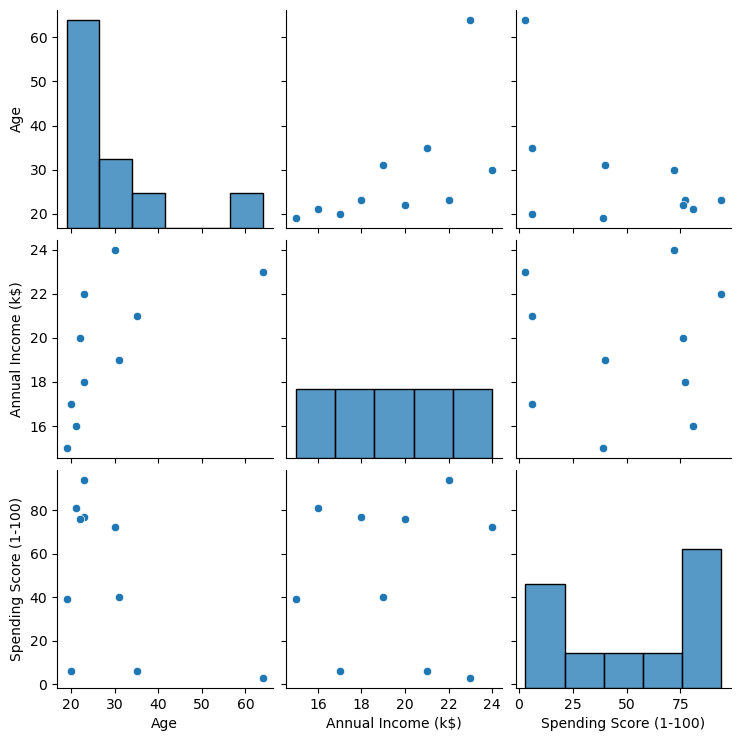

In [15]:
# Import visualization library
import seaborn as sns
import matplotlib.pyplot as plt

# Plot pairplot
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [17]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

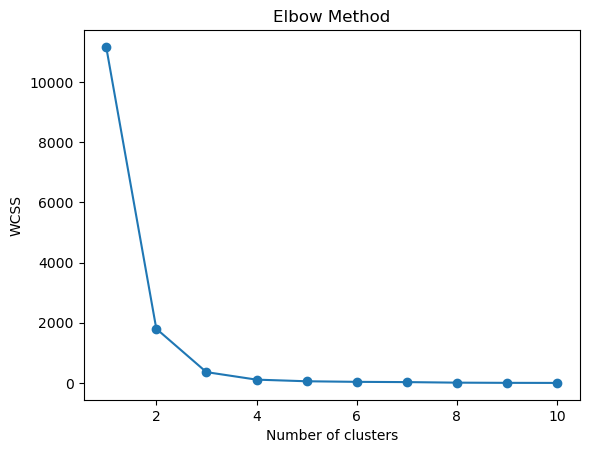

In [19]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


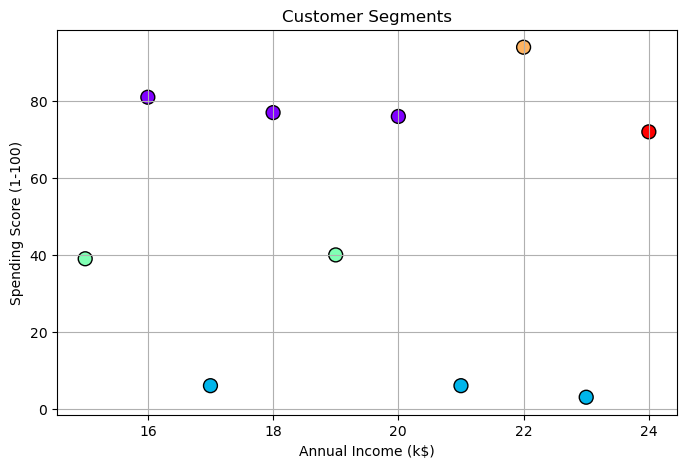

In [23]:
# Scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], 
            c=df['Cluster'], cmap='rainbow', s=100, edgecolor='black')
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.grid(True)
plt.show()


In [25]:
# Create simple labels (based on example logic – adjust later based on plots)
def label_cluster(row):
    if row['Cluster'] == 0:
        return 'Low Income - High Spend'
    elif row['Cluster'] == 1:
        return 'High Income - High Spend'
    elif row['Cluster'] == 2:
        return 'Low Income - Low Spend'
    elif row['Cluster'] == 3:
        return 'High Income - Low Spend'
    else:
        return 'Mid Income - Average Spend'

df['Segment'] = df.apply(label_cluster, axis=1)


In [27]:
df.to_csv('segmented_customers.csv', index=False)
